In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import glob
import sys
import math

In [4]:
from sklearn.datasets import load_boston

In [7]:
lb=load_boston()
lb.data
bs=pd.DataFrame(lb.data,columns=lb.feature_names)

In [8]:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bs["target"]=lb.target

In [10]:
bs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(*, return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : :class:`~sklearn.utils.Bunch`
        Dictionary-like object, with the following attributes.
    
        data : ndarray of shape (506, 13)
            The data matrix.
        target : ndarray of shape (506, )
            The regression target.
        fil

In [13]:
bs.shape

(506, 14)

In [23]:
import statsmodels.formula.api as sm
def vif_cal(input_data,dependent_col):
    data=input_data.drop([dependent_col],axis=1)
    col=list(data.columns)
    for i in col:
        x=data.drop([i],axis=1)
        y=data[i]
        rsq=sm.ols("y~x",data=data).fit().rsquared
        vif=round((1/(1-rsq)),2)
        print("vif for : ",i,"values are",vif)

In [24]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.79
vif for :  ZN values are 2.18
vif for :  INDUS values are 3.23
vif for :  CHAS values are 1.06
vif for :  NOX values are 4.37
vif for :  RM values are 1.92
vif for :  AGE values are 3.1
vif for :  DIS values are 3.95
vif for :  RAD values are 2.84
vif for :  PTRATIO values are 1.79
vif for :  B values are 1.35
vif for :  LSTAT values are 2.94


In [25]:
bs.drop(["TAX"],axis=1,inplace=True)

KeyError: "['TAX'] not found in axis"

In [26]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.79
vif for :  ZN values are 2.18
vif for :  INDUS values are 3.23
vif for :  CHAS values are 1.06
vif for :  NOX values are 4.37
vif for :  RM values are 1.92
vif for :  AGE values are 3.1
vif for :  DIS values are 3.95
vif for :  RAD values are 2.84
vif for :  PTRATIO values are 1.79
vif for :  B values are 1.35
vif for :  LSTAT values are 2.94


In [27]:
bs.drop(["NOX"],axis=1,inplace=True)

In [28]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.79
vif for :  ZN values are 2.18
vif for :  INDUS values are 2.87
vif for :  CHAS values are 1.06
vif for :  RM values are 1.9
vif for :  AGE values are 2.88
vif for :  DIS values are 3.64
vif for :  RAD values are 2.53
vif for :  PTRATIO values are 1.6
vif for :  B values are 1.34
vif for :  LSTAT values are 2.93


In [29]:
bs.drop(["DIS"],axis=1,inplace=True)

In [30]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.77
vif for :  ZN values are 1.76
vif for :  INDUS values are 2.52
vif for :  CHAS values are 1.06
vif for :  RM values are 1.88
vif for :  AGE values are 2.42
vif for :  RAD values are 2.51
vif for :  PTRATIO values are 1.53
vif for :  B values are 1.34
vif for :  LSTAT values are 2.93


In [31]:
bs.drop(["LSTAT"],axis=1,inplace=True)

In [32]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.73
vif for :  ZN values are 1.75
vif for :  INDUS values are 2.49
vif for :  CHAS values are 1.05
vif for :  RM values are 1.31
vif for :  AGE values are 2.04
vif for :  RAD values are 2.5
vif for :  PTRATIO values are 1.53
vif for :  B values are 1.3


In [34]:
bs.drop(["RAD"],axis=1,inplace=True)

In [35]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.37
vif for :  ZN values are 1.74
vif for :  INDUS values are 2.23
vif for :  CHAS values are 1.05
vif for :  RM values are 1.28
vif for :  AGE values are 2.03
vif for :  PTRATIO values are 1.37
vif for :  B values are 1.25


In [36]:
bs.drop(["INDUS"],axis=1,inplace=True)

In [37]:
vif_cal(input_data=bs,dependent_col="target")

vif for :  CRIM values are 1.34
vif for :  ZN values are 1.68
vif for :  CHAS values are 1.04
vif for :  RM values are 1.22
vif for :  AGE values are 1.67
vif for :  PTRATIO values are 1.35
vif for :  B values are 1.21


In [38]:
bs.head()

,CRIM,ZN,CHAS,RM,AGE,PTRATIO,B,target
0,0.00632,18.0,0.0,6.575,65.2,15.3,396.90,24.0
1,0.02731,0.0,0.0,6.421,78.9,17.8,396.90,21.6
2,0.02729,0.0,0.0,7.185,61.1,17.8,392.83,34.7
3,0.03237,0.0,0.0,6.998,45.8,18.7,394.63,33.4
4,0.06905,0.0,0.0,7.147,54.2,18.7,396.90,36.2


In [41]:
import statsmodels.formula.api as sm
model=sm.ols(formula="target~CRIM+ZN+CHAS+RM+AGE+PTRATIO+B",data=bs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     124.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          2.68e-105
Time:                        09:19:28   Log-Likelihood:                -1583.9
No. Observations:                 506   AIC:                             3184.
Df Residuals:                     498   BIC:                             3218.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0595      4.175     -1.691      0.091     -15.262       1.143
CRIM          -0.1078      0.033     -3.221      0.001      -0.173      -0.042
ZN            -0.0031      0.014     -0.225      0.822      -0.030       0.024
CHAS           3.5203      0.999      3.524      0.000       1.558       5.483
RM             7.0642      0.390     18.120      0.000       6.298       7.830
AGE           -0.0414      0.011     -3.637      0.000      -0.064      -0.019
PTRATIO       -0.9279      0.133     -6.974      0.000      -1.189      -0.667
B              0.0150      0.003      5.008      0.000       0.009       0.021
==============================================================================
Omnibus:                      284.167   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.018
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      14.103   Cond. No.                     6.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import statsmodels.formula.api as sm
model=sm.ols(formula="target~CRIM+CHAS+RM+AGE+PTRATIO+B",data=bs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          2.18e-106
Time:                        09:20:30   Log-Likelihood:                -1583.9
No. Observations:                 506   AIC:                             3182.
Df Residuals:                     499   BIC:                             3211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2456      4.088     -1.772      0.077     -15.278       0.786
CRIM          -0.1084      0.033     -3.254      0.001      -0.174      -0.043
CHAS           3.5308      0.997      3.542      0.000       1.572       5.489
RM             7.0513      0.385     18.303      0.000       6.294       7.808
AGE           -0.0402      0.010     -4.069      0.000      -0.060      -0.021
PTRATIO       -0.9199      0.128     -7.186      0.000      -1.171      -0.668
B              0.0150      0.003      5.010      0.000       0.009       0.021
==============================================================================
Omnibus:                      283.471   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.941
Skew:                           2.236   Prob(JB):                         0.00
Kurtosis:                      14.060   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
round(model.pvalues,5)[1:]    # cheching p value is <=0.05 for all independent variables

CRIM       0.00121
CHAS       0.00043
RM         0.00000
AGE        0.00005
PTRATIO    0.00000
B          0.00000
dtype: float64

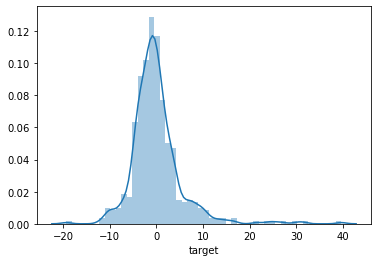

In [45]:
sbn.distplot(bs["target"]-(model.predict()))

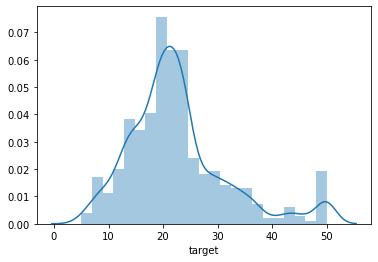

In [47]:
sbn.distplot(bs["target"])

In [48]:
bs["target"].skew()

1.1080984082549072

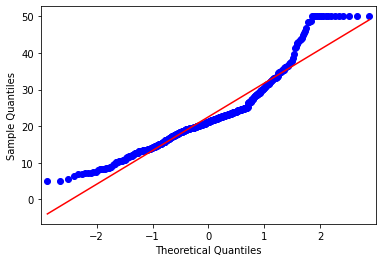

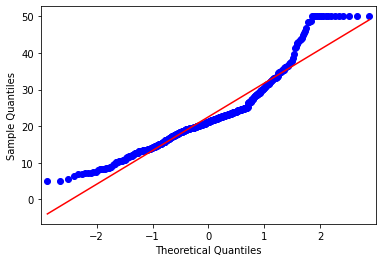

In [51]:
from statsmodels.graphics.gofplots import qqplot
qqplot(bs["target"],line="s")                     # by seeing the below diagrams data points are not inthe line so 
                                                  # data is not standard normalized

# data is not standard normalized so we have to use Transformation techniques like log,suare,suareroot,inverse

In [52]:
np.log(bs["target"]).skew()

-0.33032129530987864

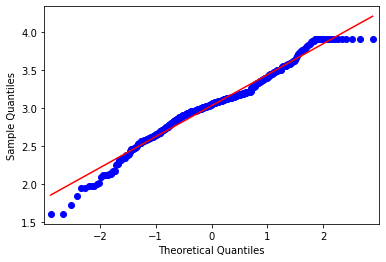

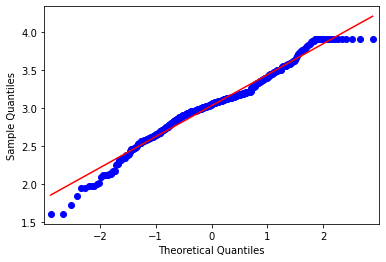

In [53]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(bs["target"]),line="s") 

In [54]:
np.log(-1)

<ipython-input-54-0cd3490738d5>:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [55]:
np.log(1)

0.0

In [56]:
np.log(0)

<ipython-input-56-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

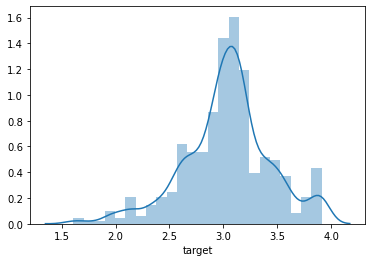

In [63]:
sbn.distplot(np.log(bs["target"]))

In [60]:
print("log",np.log(bs["target"]).skew())
print("sqrt",np.sqrt(bs["target"]).skew())
print("square",np.square(bs["target"]).skew())
print("inverse",(1/bs["target"]).skew())

log -0.33032129530987864
sqrt 0.43893531933950786
square 2.1723997509360813
inverse 2.230170962323889


In [61]:
bs["log_target"]=np.log(bs["target"])

In [62]:
import statsmodels.formula.api as sm
model=sm.ols(formula="log_target~CRIM+CHAS+RM+AGE+PTRATIO+B",data=bs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          3.24e-114
Time:                        09:35:51   Log-Likelihood:                 9.8597
No. Observations:                 506   AIC:                            -5.719
Df Residuals:                     499   BIC:                             23.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0224      0.175     11.542      0.000       1.678       2.367
CRIM          -0.0117      0.001     -8.219      0.000      -0.015      -0.009
CHAS           0.1425      0.043      3.336      0.001       0.059       0.226
RM             0.2559      0.017     15.501      0.000       0.224       0.288
AGE           -0.0025      0.000     -5.964      0.000      -0.003      -0.002
PTRATIO       -0.0355      0.005     -6.475      0.000      -0.046      -0.025
B              0.0007      0.000      5.793      0.000       0.000       0.001
==============================================================================
Omnibus:                      135.994   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1050.492
Skew:                           0.942   Prob(JB):                    7.74e-229
Kurtosis:                       9.803   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
model.predict()

array([3.29175453, 3.12871831, 3.36615552, 3.32620304, 3.34439938,
       3.14792617, 3.1457484 , 3.11257215, 2.95585908, 3.08744736,
       3.16539038, 3.10447566, 3.18005625, 2.93031583, 2.89804145,
       2.91333221, 2.99630022, 2.88125456, 2.78560323, 2.84852438,
       2.71933556, 2.85942587, 2.8972011 , 2.79316314, 2.8390984 ,
       2.70858257, 2.80824488, 2.81627105, 2.9794797 , 3.0347952 ,
       2.75527721, 2.84193942, 2.74877592, 2.74865068, 2.75757093,
       2.98064855, 2.95951539, 3.02658549, 3.08109855, 3.29861779,
       3.42348167, 3.39654997, 3.23170977, 3.25073273, 3.12652995,
       3.04812279, 3.07580437, 3.0029804 , 2.81954809, 2.95592678,
       3.12906964, 3.12367562, 3.33280604, 3.20079147, 2.95420797,
       3.48035848, 3.24583293, 3.41980228, 3.10987614, 3.01387885,
       2.91646385, 2.89252156, 3.09721724, 3.23593261, 3.32143809,
       3.3096418 , 3.14724805, 3.09487313, 2.98292808, 3.06708393,
       3.24989758, 3.0998161 , 3.16206446, 3.2007583 , 3.24072

In [65]:
bs["predict"]=model.predict()

In [66]:
bs.head()

,CRIM,ZN,CHAS,RM,AGE,PTRATIO,B,target,log_target,predict
0,0.00632,18.0,0.0,6.575,65.2,15.3,396.90,24.0,3.178054,3.291755
1,0.02731,0.0,0.0,6.421,78.9,17.8,396.90,21.6,3.072693,3.128718
2,0.02729,0.0,0.0,7.185,61.1,17.8,392.83,34.7,3.546740,3.366156
3,0.03237,0.0,0.0,6.998,45.8,18.7,394.63,33.4,3.508556,3.326203
4,0.06905,0.0,0.0,7.147,54.2,18.7,396.90,36.2,3.589059,3.344399


In [67]:
abs(model.tvalues[1:])

CRIM        8.218503
CHAS        3.335516
RM         15.500627
AGE         5.963650
PTRATIO     6.474995
B           5.793174
dtype: float64

In [68]:
# removing the chas variable 


import statsmodels.formula.api as sm
model=sm.ols(formula="log_target~CRIM+RM+AGE+PTRATIO+B",data=bs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     189.7
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          5.35e-113
Time:                        19:28:52   Log-Likelihood:                 4.2808
No. Observations:                 506   AIC:                             3.438
Df Residuals:                     500   BIC:                             28.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0245      0.177     11.439      0.000       1.677       2.372
CRIM          -0.0119      0.001     -8.278      0.000      -0.015      -0.009
RM             0.2597      0.017     15.608      0.000       0.227       0.292
AGE           -0.0023      0.000     -5.474      0.000      -0.003      -0.001
PTRATIO       -0.0375      0.006     -6.802      0.000      -0.048      -0.027
B              0.0008      0.000      5.881      0.000       0.001       0.001
==============================================================================
Omnibus:                      144.880   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.443
Skew:                           1.016   Prob(JB):                    4.56e-247
Kurtosis:                      10.048   Cond. No.                     6.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""